In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hyundi.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


<Axes: >

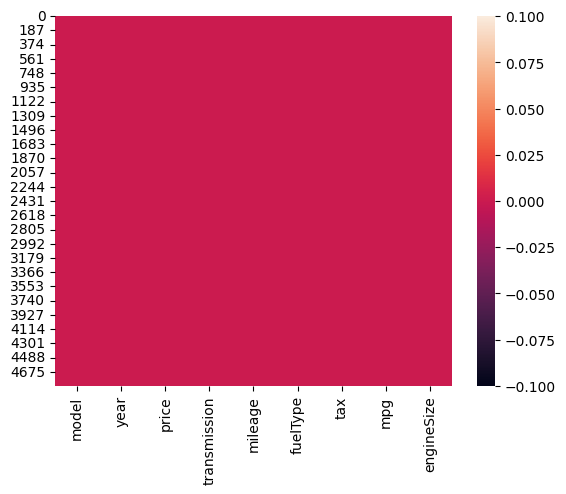

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


In [8]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax':'nomberOfCars'})


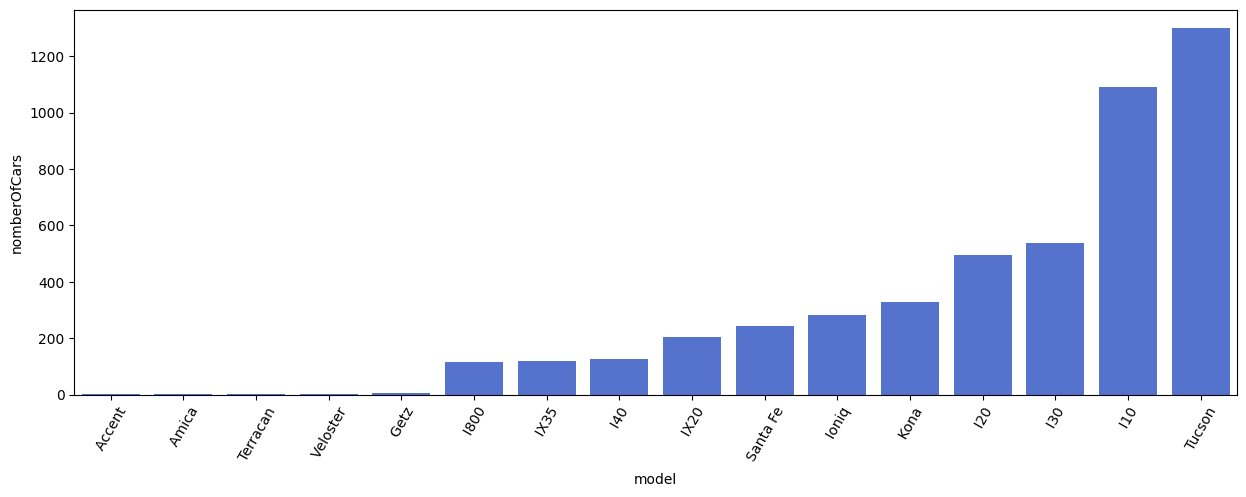

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['nomberOfCars'], color='royalblue')
plt.xticks(rotation=60)
plt.show()

In [10]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'Count'})

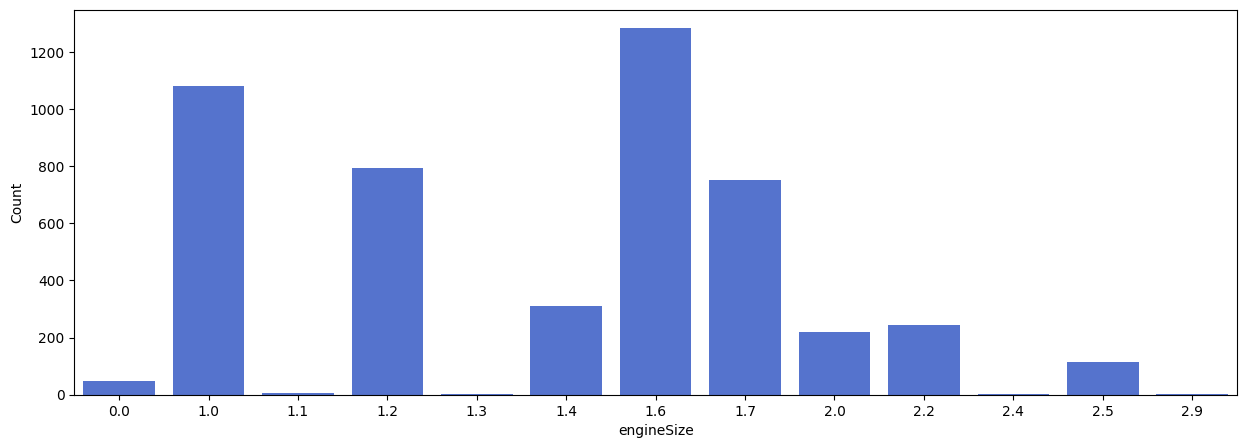

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['Count'], color='royalblue')
plt.show()

<ipython-input-12-8a407d5b8387>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

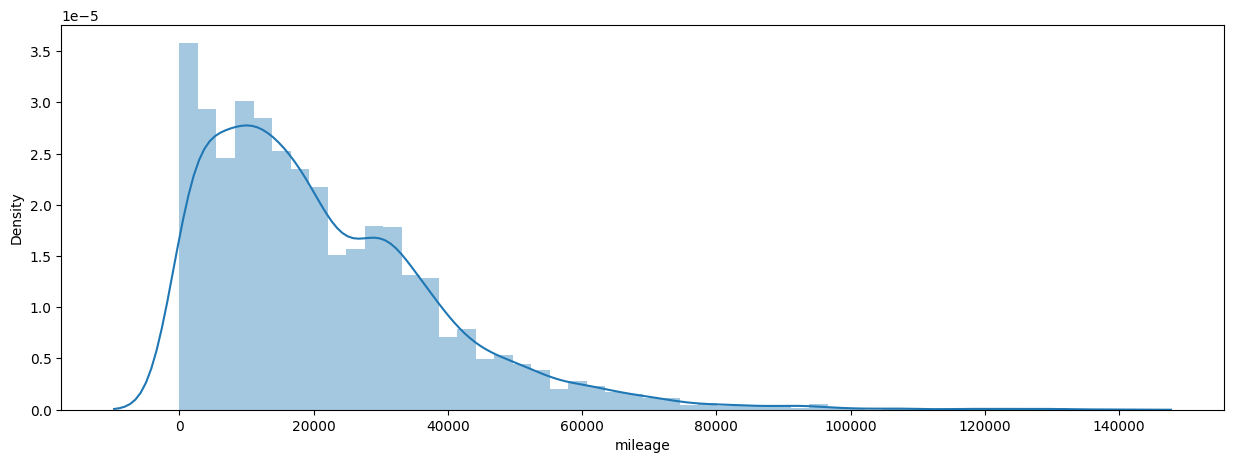

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

<ipython-input-13-7a32f1d4aa34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

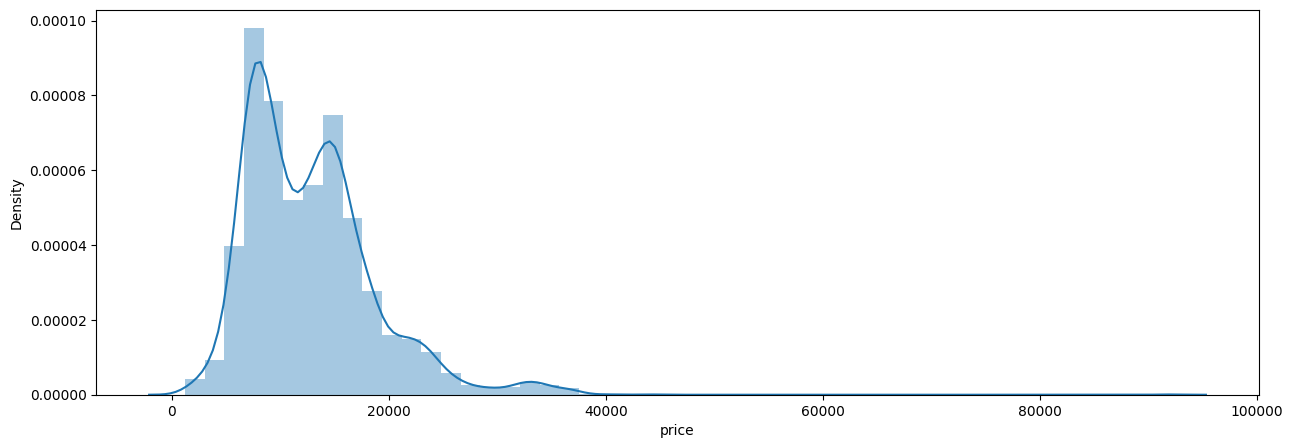

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

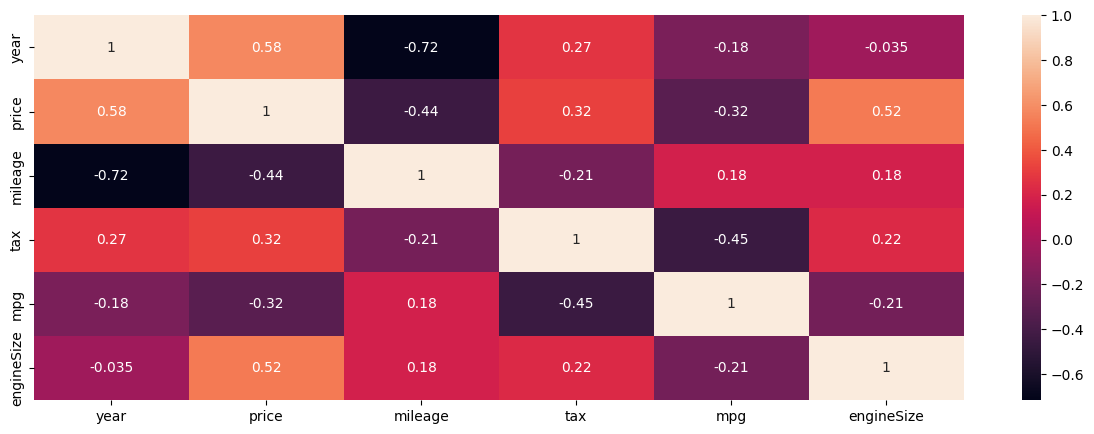

In [14]:
plt.figure(figsize=(15,5))
numerical_df =df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((4860, 5), (4860,))

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_test.shape

(972,)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [18]:
score = lr.score(x_test,y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.6778252730140641


# inputan model regresi linear

In [19]:
#year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2017,5000,145,30.2,2]])
prediction = lr.predict(input_data)
print('Estimasi Harga mobil dalam EUR = ', prediction)

Estimasi Harga mobil dalam EUR =  [19668.21193391]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Save model

In [26]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr, open(filename,'wb'))